In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_excel("/content/District-wise crop production statistics data.xlsx")

In [108]:
df.head()

,Index,State/Union Territory,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,1,Andaman and Nicobar Islands,Nicobars,Rice,2010,Autumn,3.50,10.0,2.857143
1,2,Andaman and Nicobar Islands,Nicobars,Rice,2011,Autumn,1.50,2.5,1.666667
2,3,Andaman and Nicobar Islands,Nicobars,Rice,2012,Autumn,0.35,0.4,1.142857
3,4,Andaman and Nicobar Islands,Nicobars,Rice,2013,Autumn,2.65,6.3,2.377358
4,5,Andaman and Nicobar Islands,Nicobars,Rice,2014,Autumn,4.60,10.8,2.347826


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18262 entries, 0 to 18261
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   18262 non-null  int64  
 1   State/Union Territory   18262 non-null  object 
 2   District                18262 non-null  object 
 3   Crop                    18262 non-null  object 
 4   Year                    18262 non-null  int64  
 5   Season                  18262 non-null  object 
 6   Area (Hectare)          18262 non-null  float64
 7   Production (Tonnes)     18245 non-null  float64
 8   Yield (Tonnes/Hectare)  18262 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [110]:
df.describe()

,Index,Year,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
count,18262.000000,18262.000000,18262.000000,1.824500e+04,18262.000000
mean,9151.704523,2014.676541,56207.866006,1.549210e+05,2.387355
std,5281.523573,2.881904,74847.415007,2.370063e+05,1.028731
min,1.000000,2010.000000,0.350000,0.000000e+00,0.000000
25%,4580.250000,2012.000000,3090.000000,5.339000e+03,1.638134
50%,9145.500000,2015.000000,24532.000000,5.162800e+04,2.319943
75%,13733.750000,2017.000000,86392.250000,2.107840e+05,3.013726
max,18299.000000,2020.000000,920000.000000,2.110172e+06,7.176796


In [111]:
df.describe(include=object)

,State/Union Territory,District,Crop,Season
count,18262,18262,18262,18262
unique,36,794,2,7
top,Uttar Pradesh,Kokrajhar,Rice,Rabi
freq,1924,50,13056,5649


In [112]:
df.shape

(18262, 9)

In [113]:
df.isna().sum()

,0
Index,0
State/Union Territory,0
District,0
Crop,0
Year,0
Season,0
Area (Hectare),0
Production (Tonnes),17
Yield (Tonnes/Hectare),0


In [114]:
df[df['Production (Tonnes)'].isna()]

,Index,State/Union Territory,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
506,518,Andhra Pradesh,Kadapa,Wheat,2019,Rabi,1.0,NaN,0.0
5114,5129,Haryana,Mahendragarh,Rice,2011,Kharif,39.0,NaN,0.0
8379,8394,Kerala,Idukki,Wheat,2012,Whole Year,1.0,NaN,0.0
8394,8409,Madhya Pradesh,Agar Malwa,Rice,2019,Summer,98.0,NaN,0.0
8658,8673,Madhya Pradesh,Khandwa,Rice,2019,Summer,2605.0,NaN,0.0
8880,8895,Madhya Pradesh,Ujjain,Rice,2019,Summer,29.0,NaN,0.0
9704,9719,Maharashtra,Parbhani,Rice,2014,Kharif,300.0,NaN,0.0
9827,9842,Maharashtra,Solapur,Rice,2015,Kharif,200.0,NaN,0.0
9865,9880,Maharashtra,Yavatmal,Rice,2013,Kharif,100.0,NaN,0.0
12119,12134,Odisha,Nayagarh,Rice,2012,Summer,209000.0,NaN,0.0


In [115]:
df['Production (Tonnes)'].fillna(0, inplace=True)

In [116]:
df['Production (Tonnes)'].isna().sum()

0

In [117]:
df.duplicated().sum()

0

In [118]:
df['Season'].value_counts()

,count
Season,
Rabi,5649
Kharif,4497
Total,2776
Summer,2091
Winter,1669
Autumn,1573
Whole Year,7


In [119]:
df.drop(df[df['Season'] == 'Total'].index, inplace=True)

In [120]:
df.drop(df[['Index', 'Yield (Tonnes/Hectare)']], axis=1, inplace=True)

<Axes: >

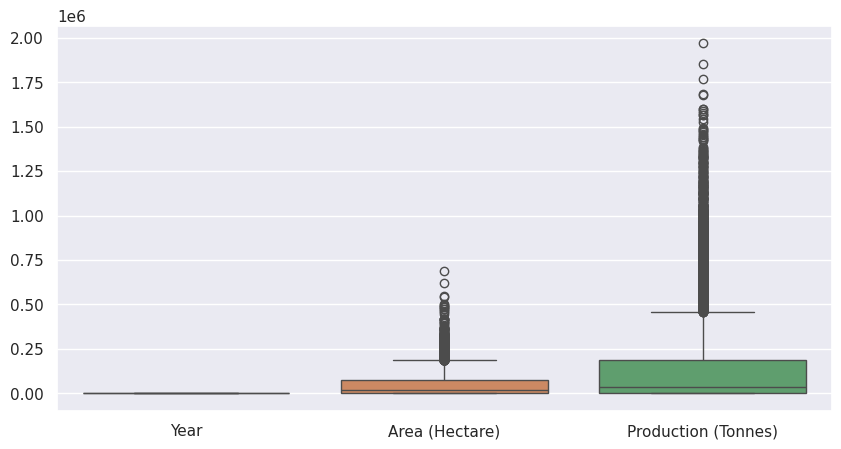

In [121]:
plt.figure(figsize=(10, 5))
sns.boxplot(df)

In [122]:
df.describe()

,Year,Area (Hectare),Production (Tonnes)
count,15486.000000,15486.000000,1.548600e+04
mean,2014.657949,49065.255867,1.401644e+05
std,2.881327,66086.220051,2.228372e+05
min,2010.000000,0.350000,0.000000e+00
25%,2012.000000,2039.000000,3.529000e+03
50%,2015.000000,18235.500000,3.732200e+04
75%,2017.000000,76007.500000,1.859012e+05
max,2020.000000,687000.000000,1.969000e+06


In [123]:
df['Area (Hectare)'].mean()

49065.25586658917

In [124]:
df.rename(columns={'State/Union Territory': 'State and UT'}, inplace=True)

,State and UT,Area (Hectare)
33,Uttar Pradesh,156722905.0
19,Madhya Pradesh,84905654.0
27,Punjab,61871000.0
35,West Bengal,57023596.0
4,Bihar,53423287.0


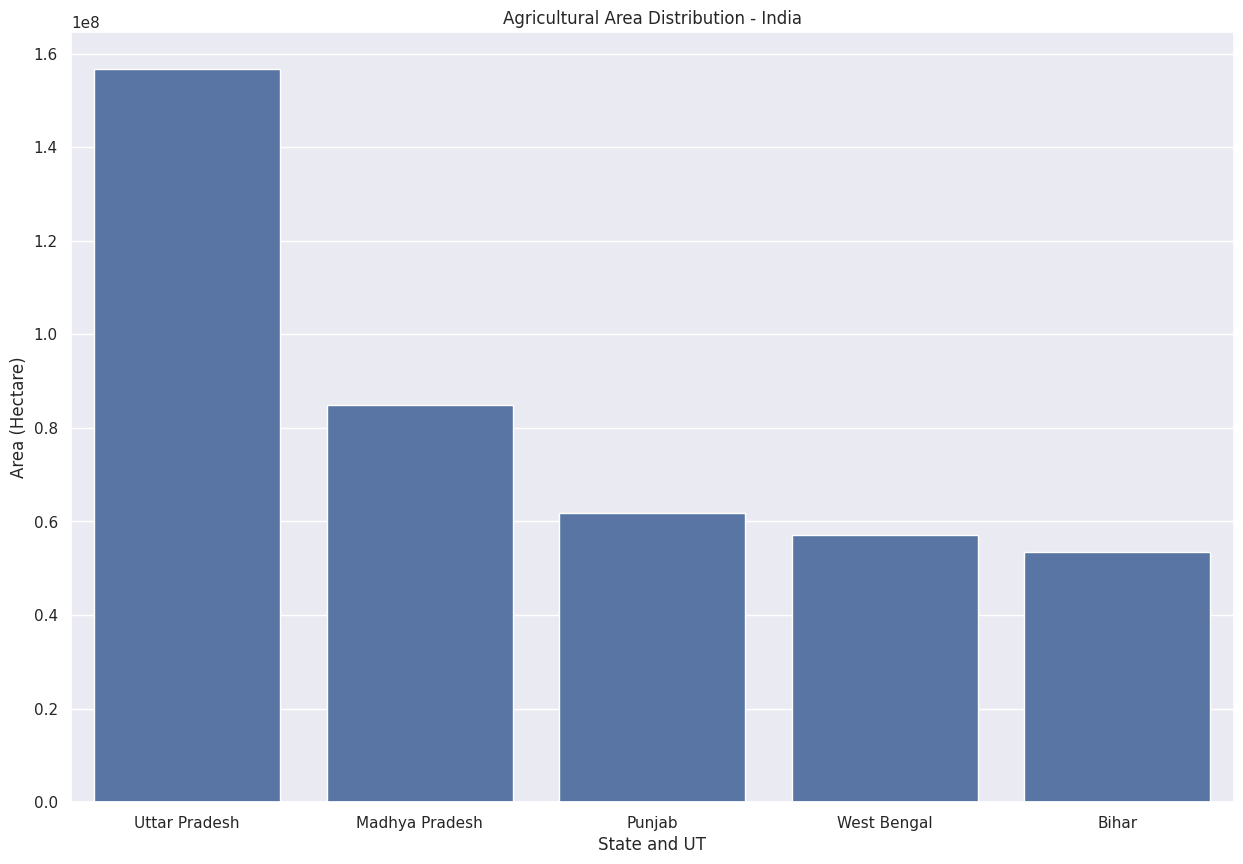

In [125]:
DF = df.copy()
DF = DF.groupby(
    by='State and UT')['Area (Hectare)'].sum().reset_index().sort_values(
        by='Area (Hectare)', ascending=False)
DF.head()

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=DF['State and UT'].head(5),
            y=DF['Area (Hectare)'].head(5),
            )


plt.title('Agricultural Area Distribution - India')
DF.head(5)

In [126]:
df['State and UT'].nunique()

36

In [127]:
df['State and UT'].value_counts()

,count
State and UT,
Uttar Pradesh,1706
Bihar,1210
Assam,1053
Madhya Pradesh,1002
Odisha,963
Karnataka,857
West Bengal,772
Maharashtra,655
Jharkhand,604


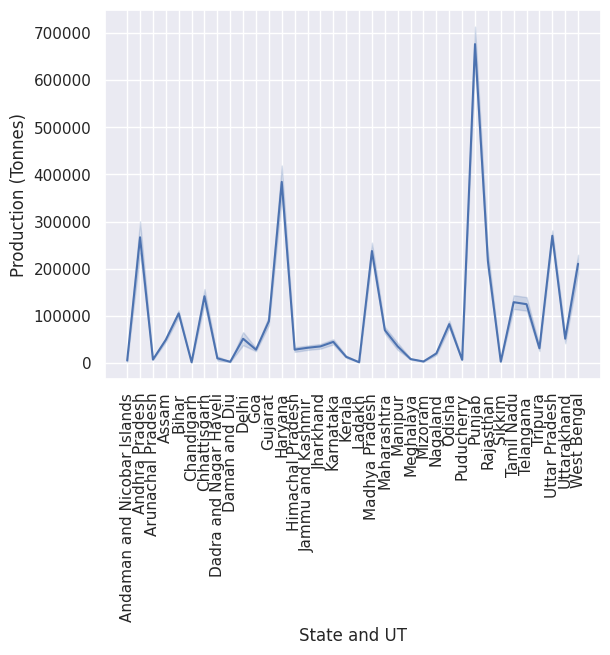

In [128]:
sns.lineplot(x=df['State and UT'], y=df['Production (Tonnes)'])
plt.xticks(rotation=90)
plt.show()

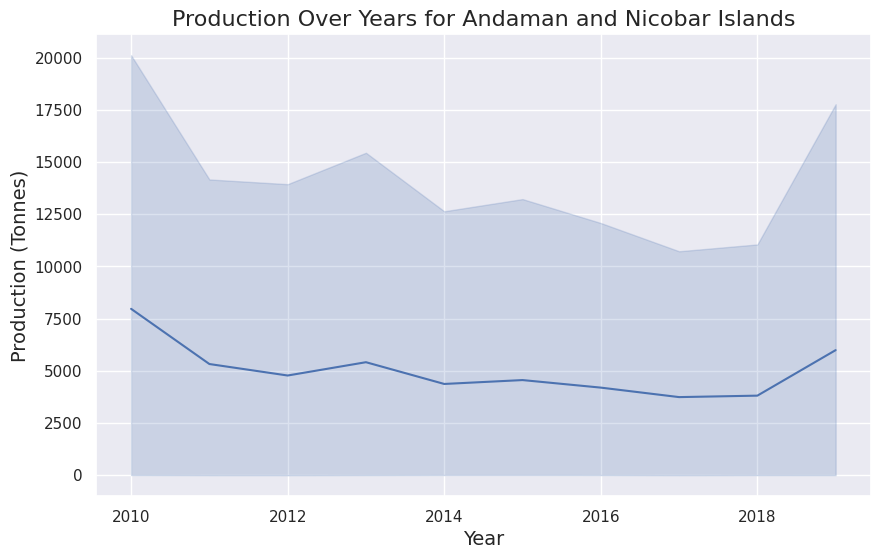

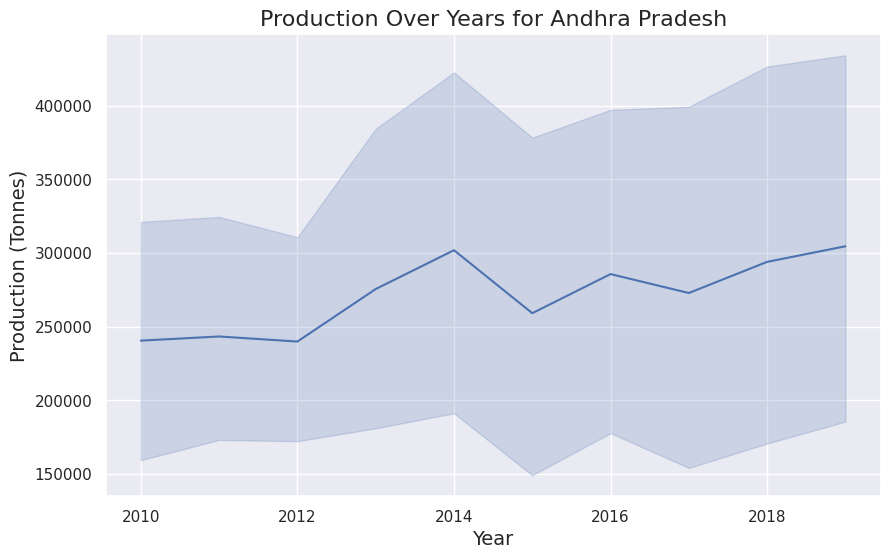

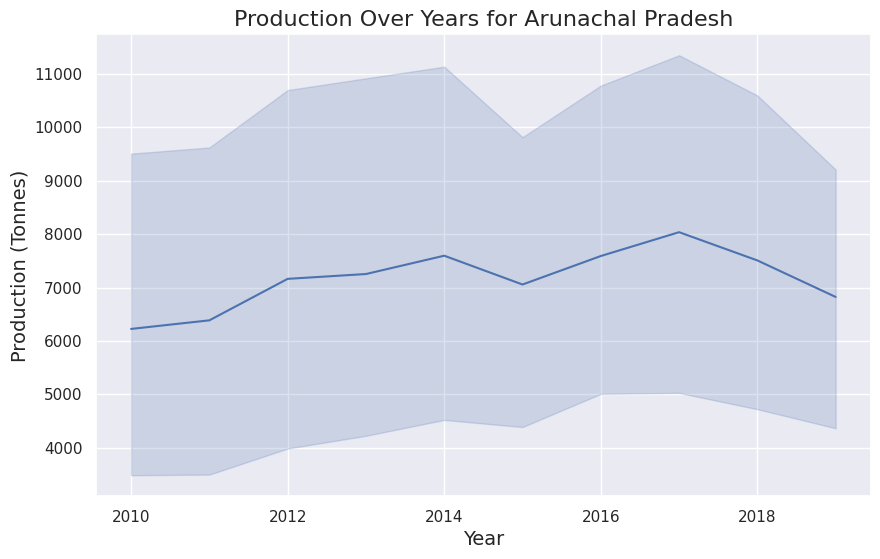

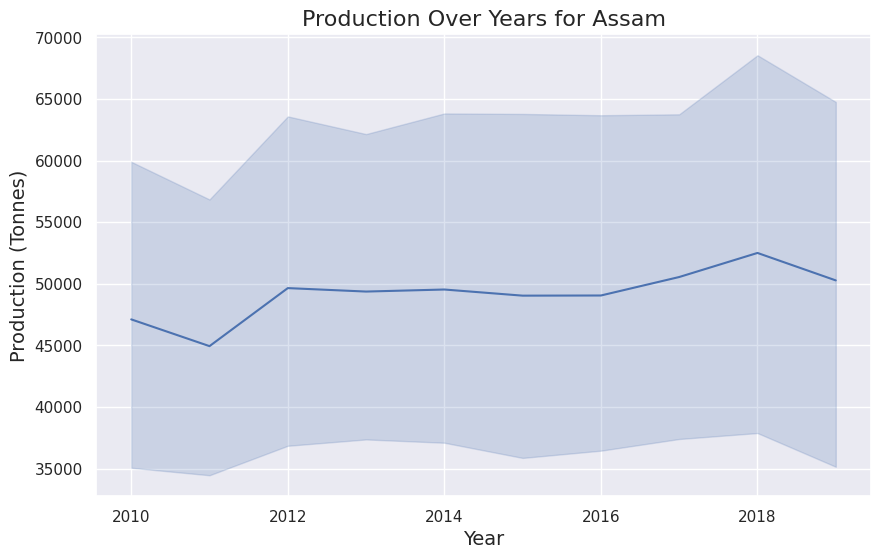

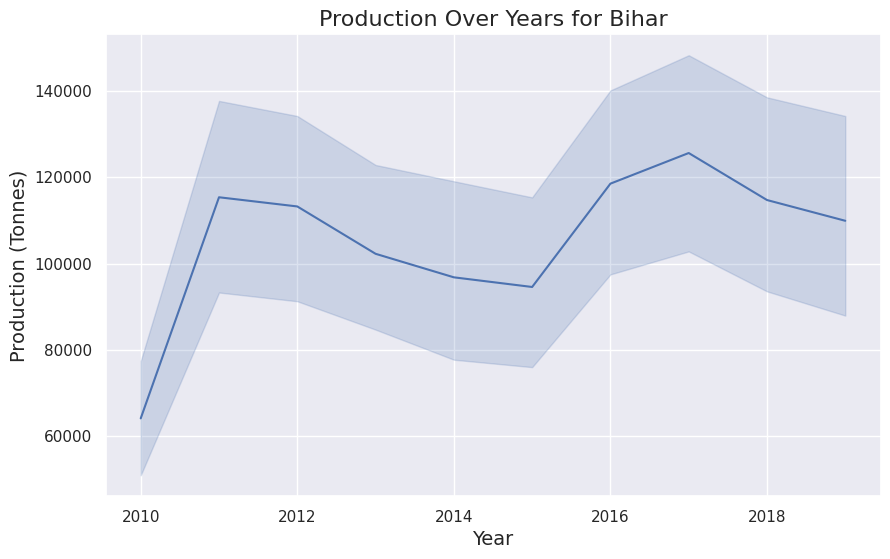

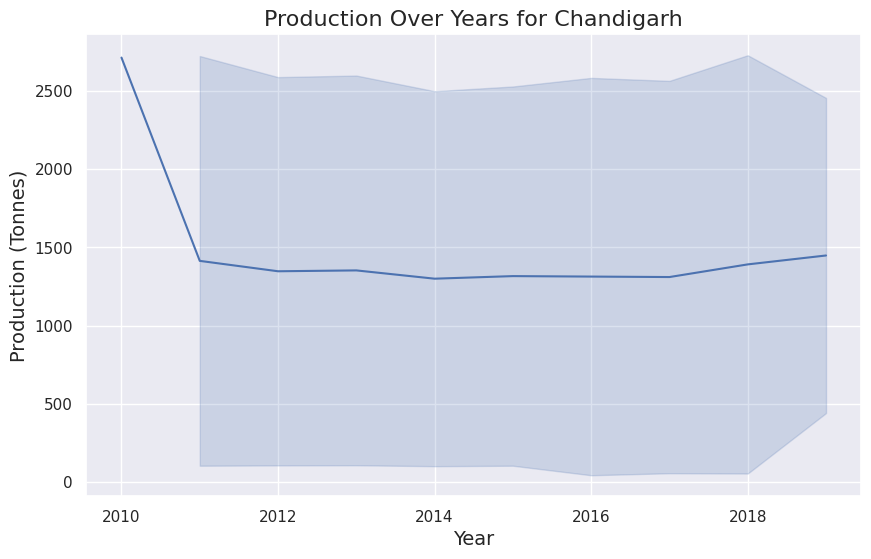

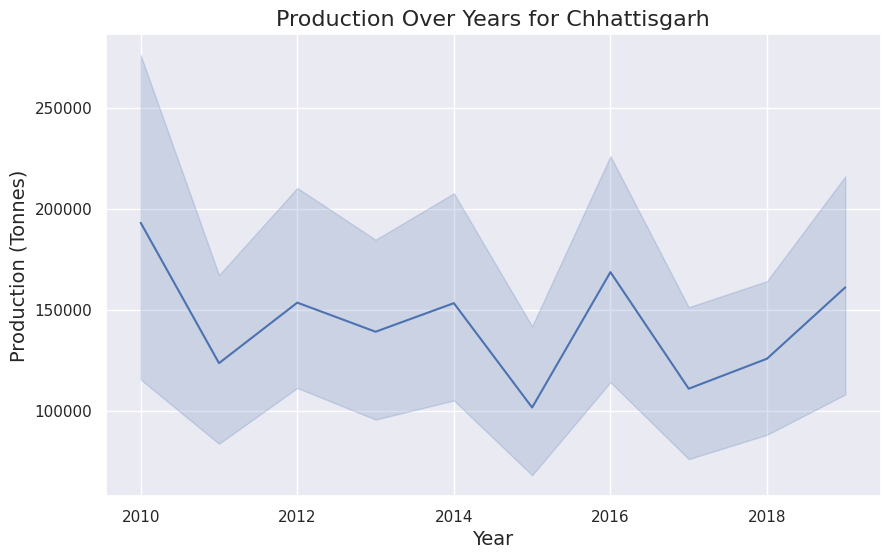

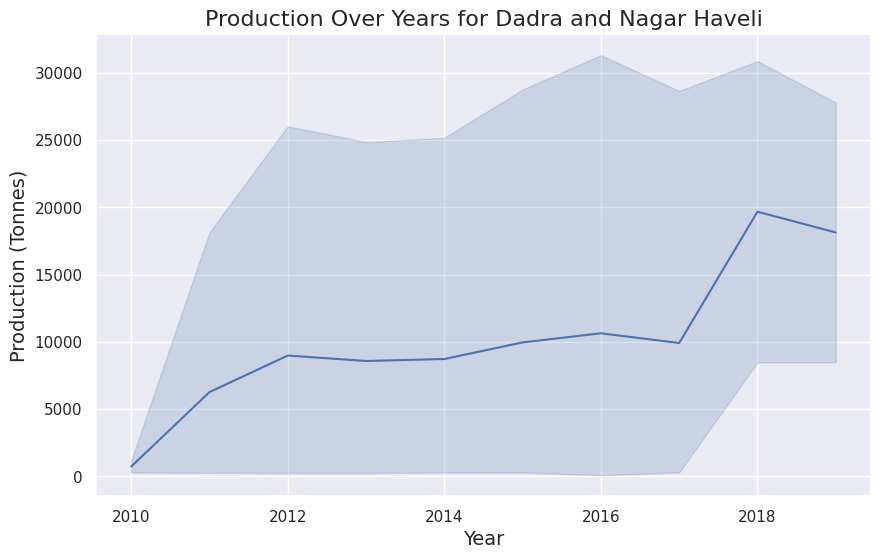

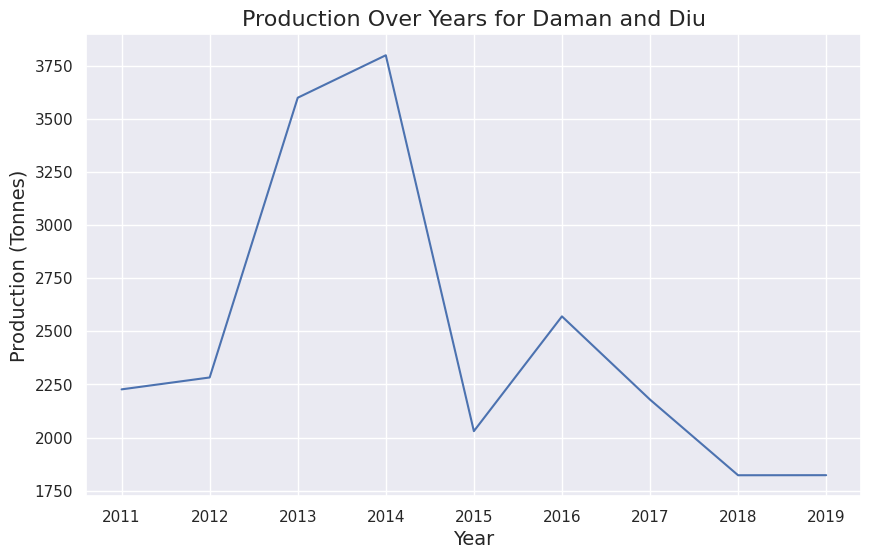

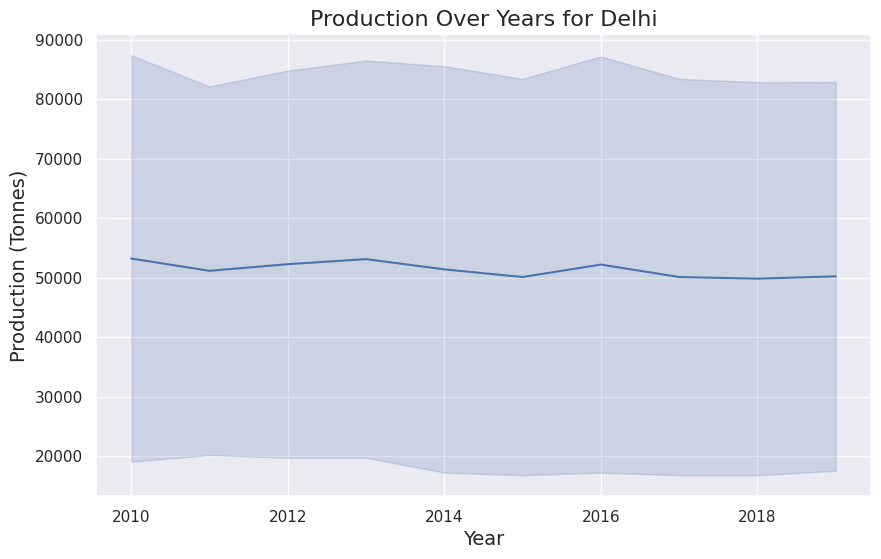

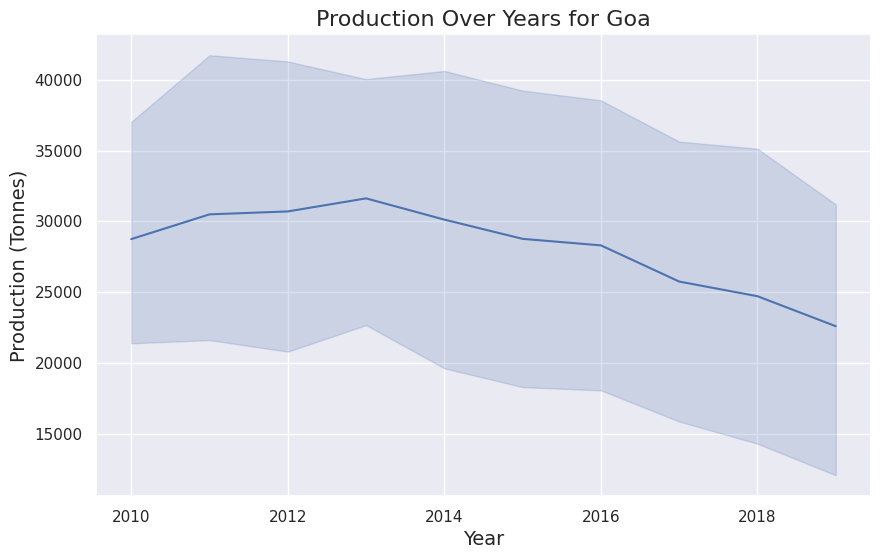

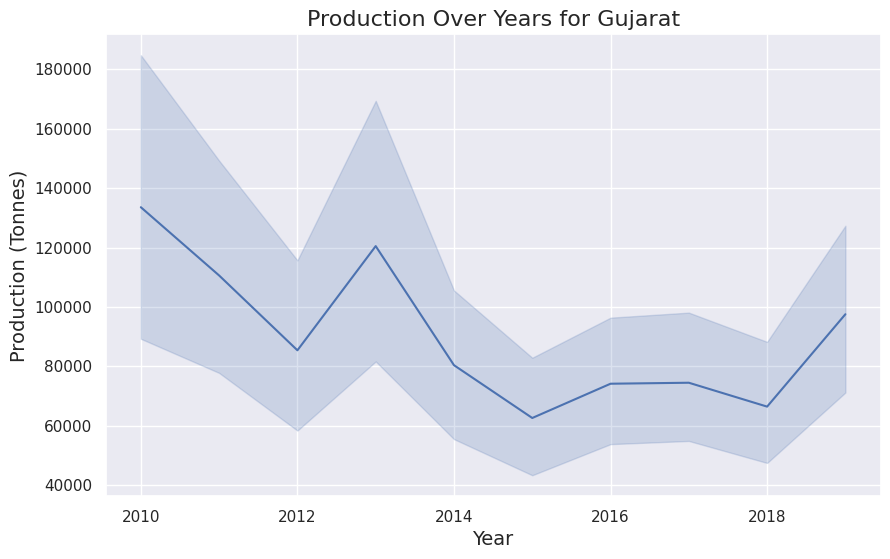

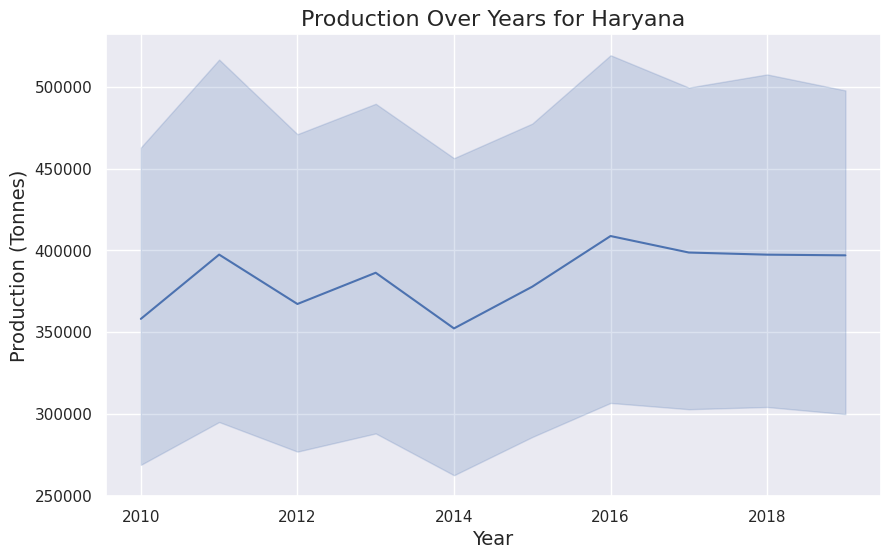

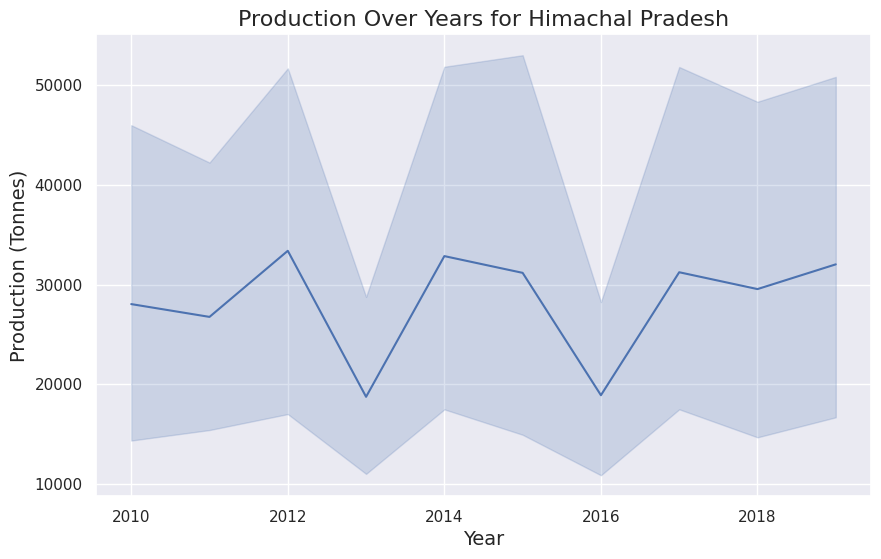

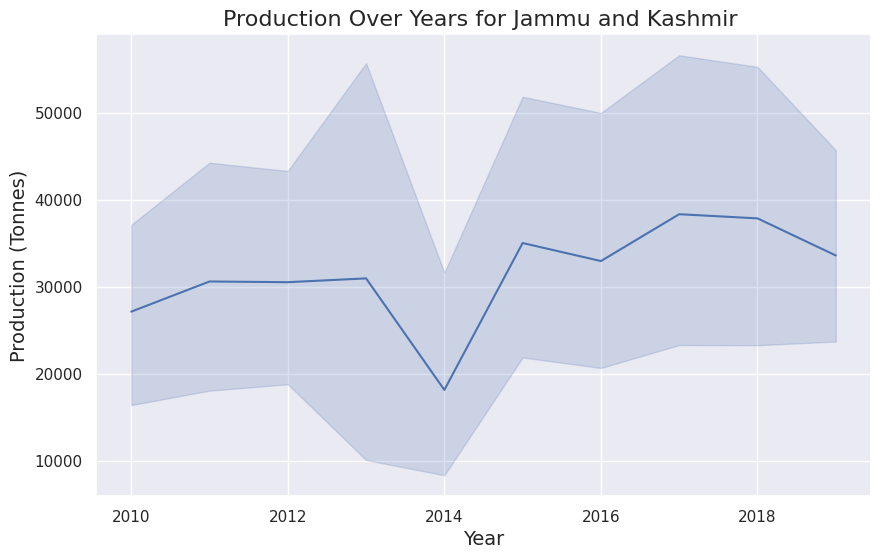

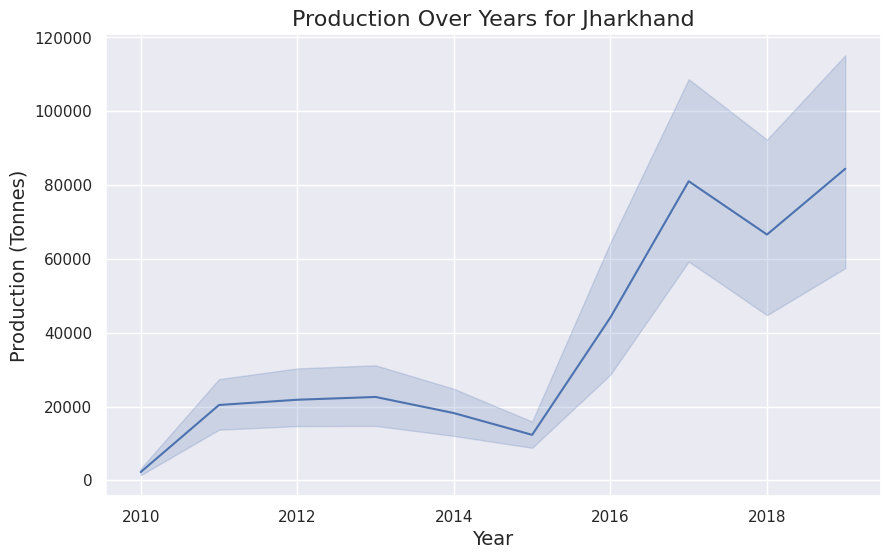

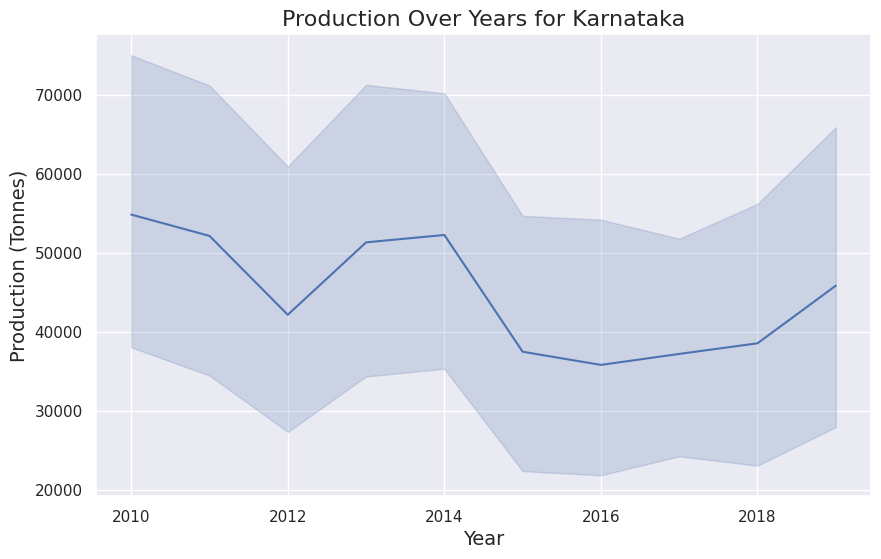

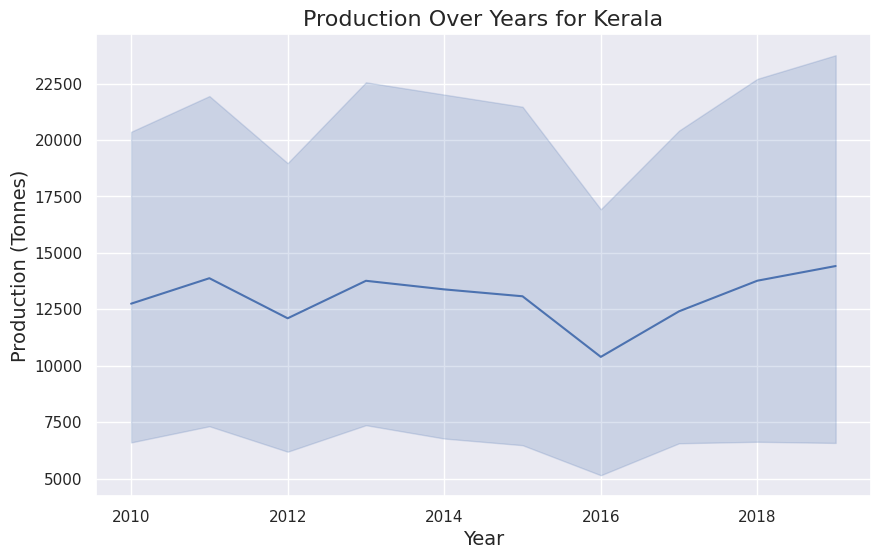

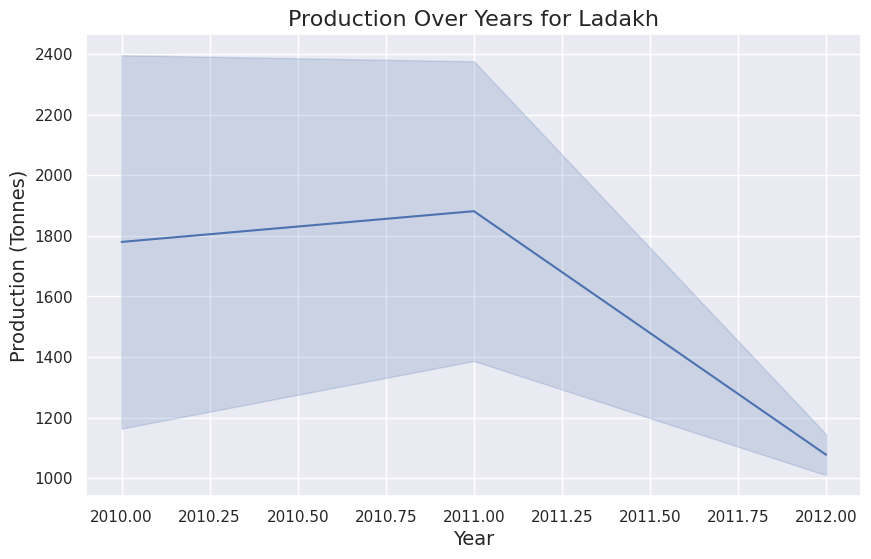

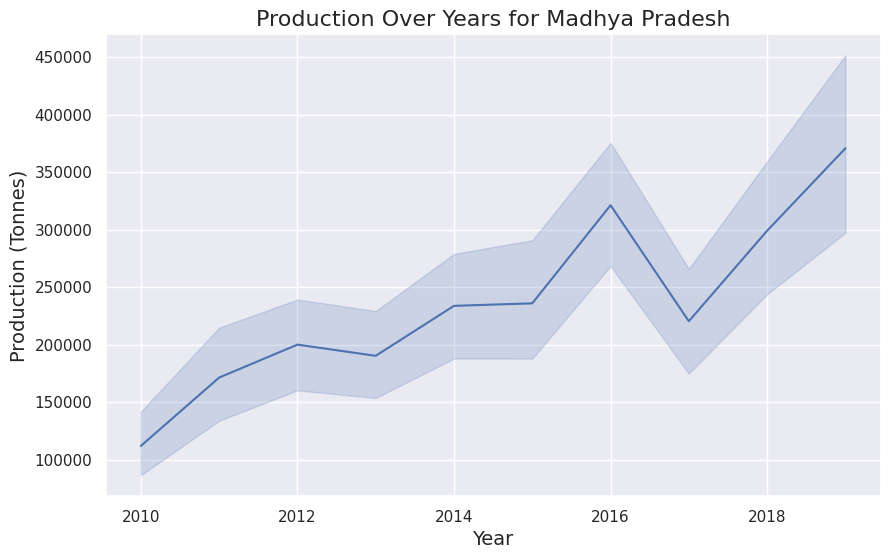

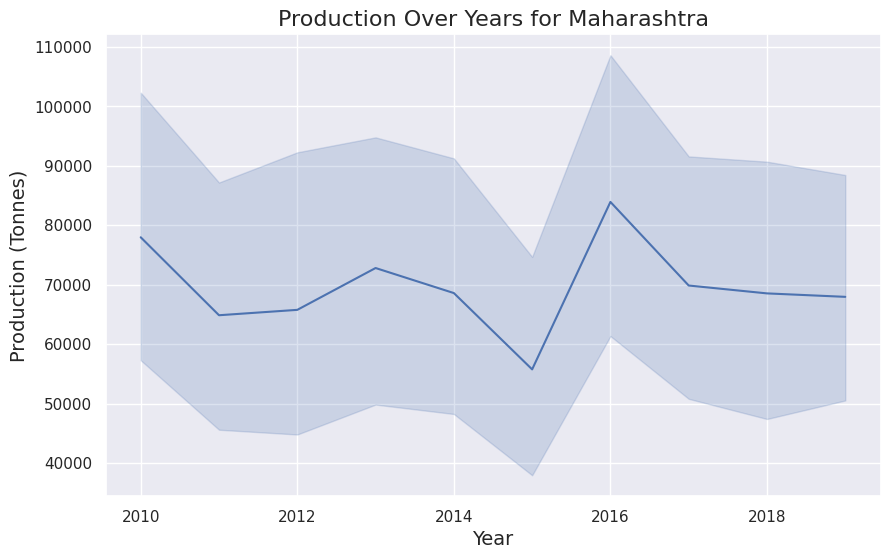

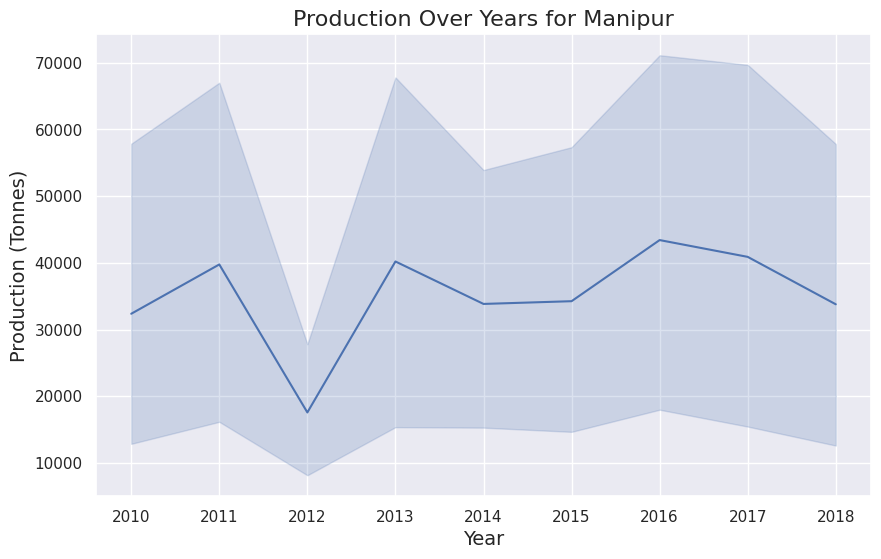

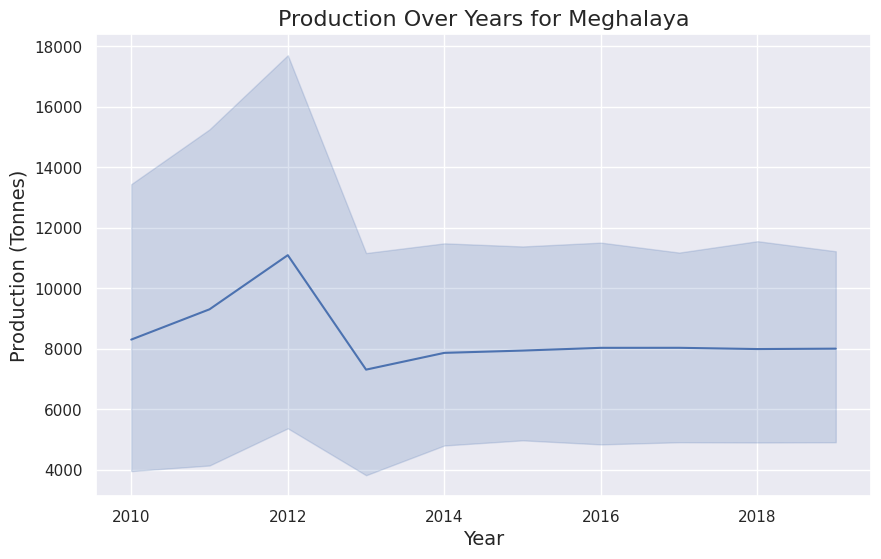

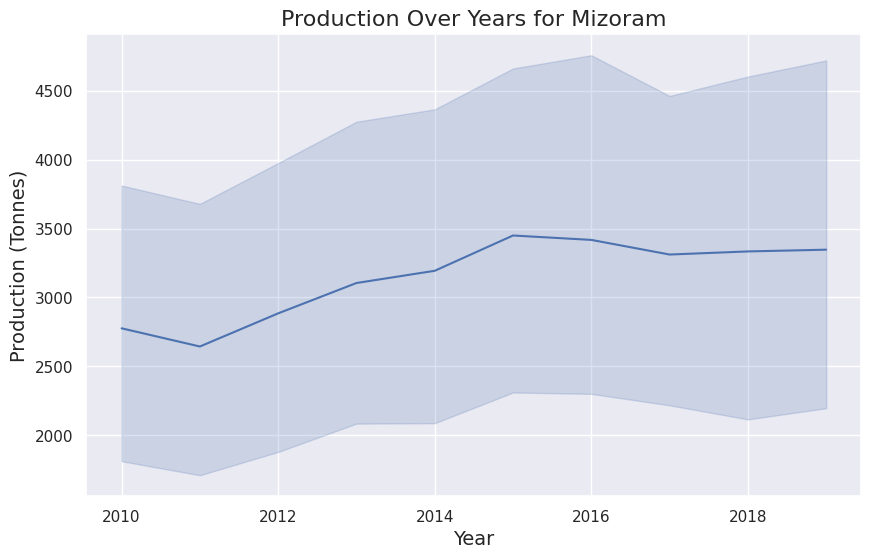

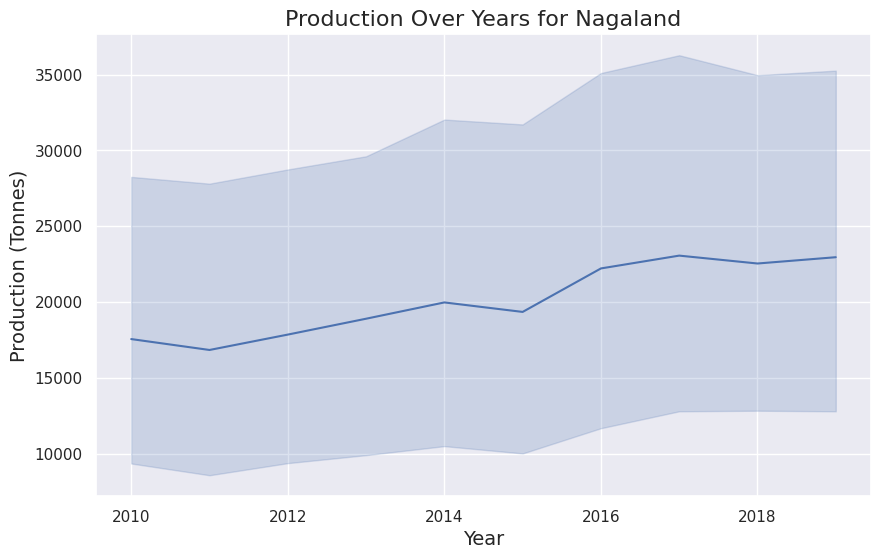

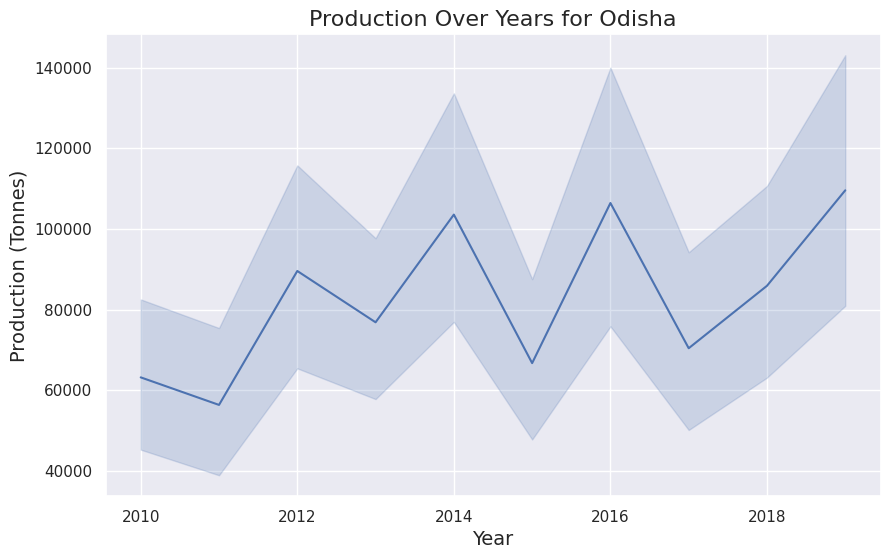

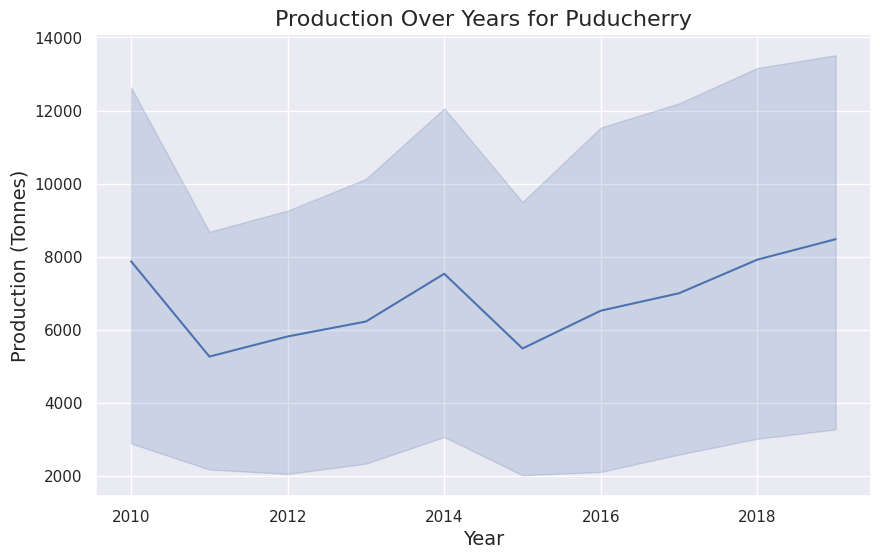

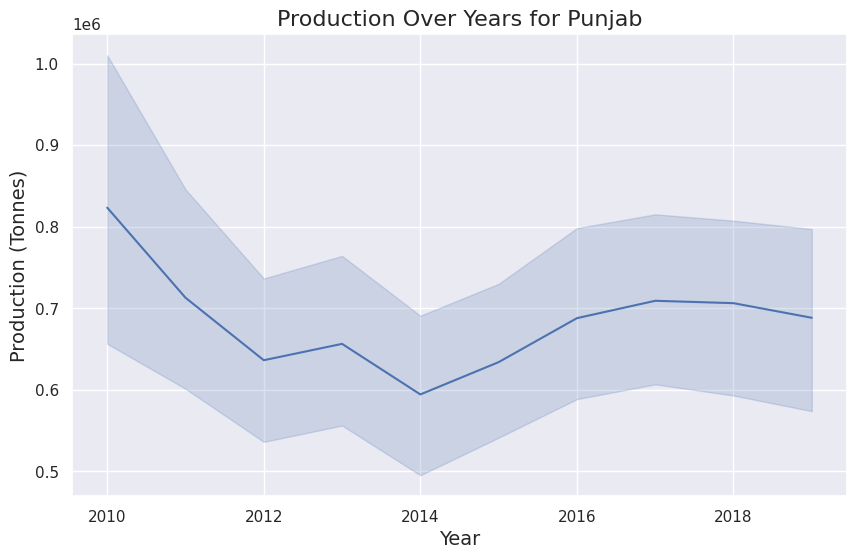

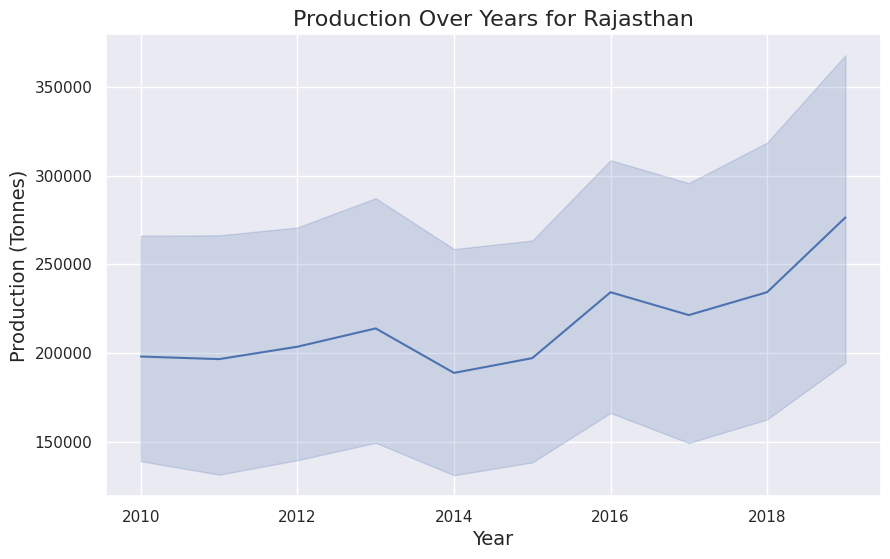

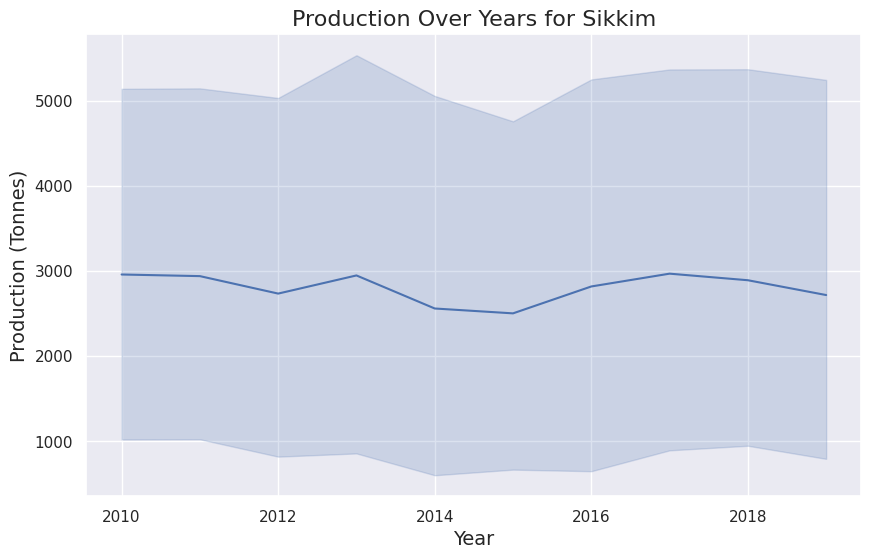

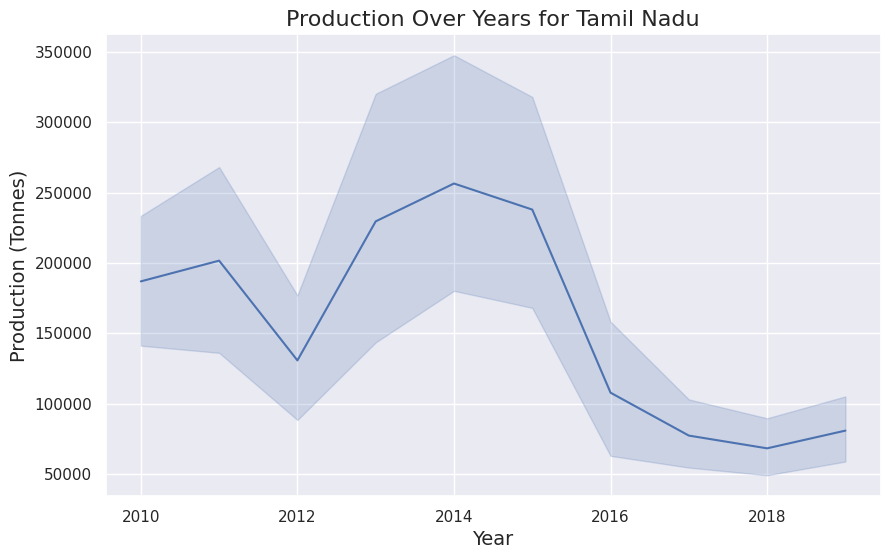

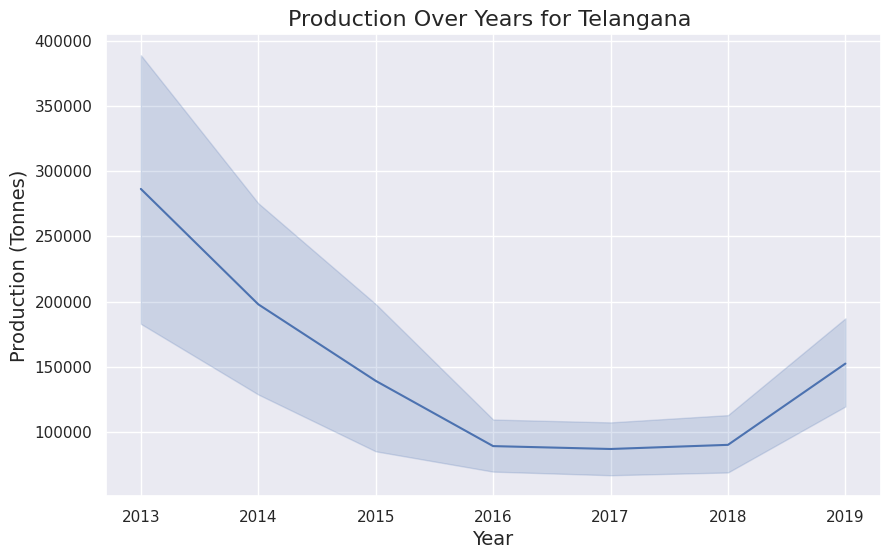

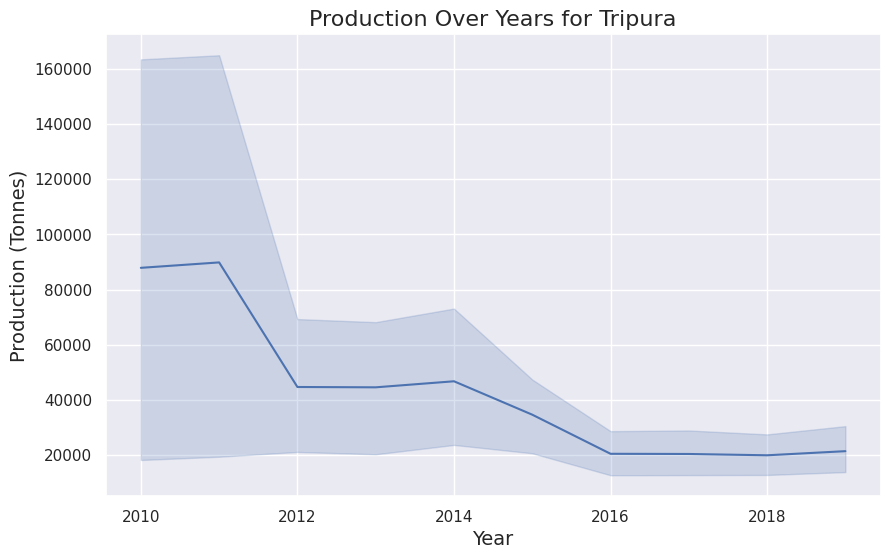

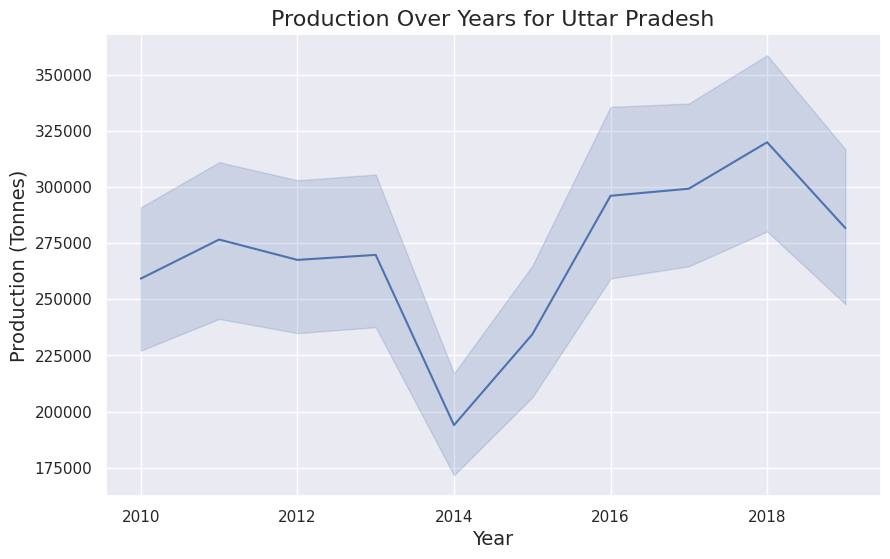

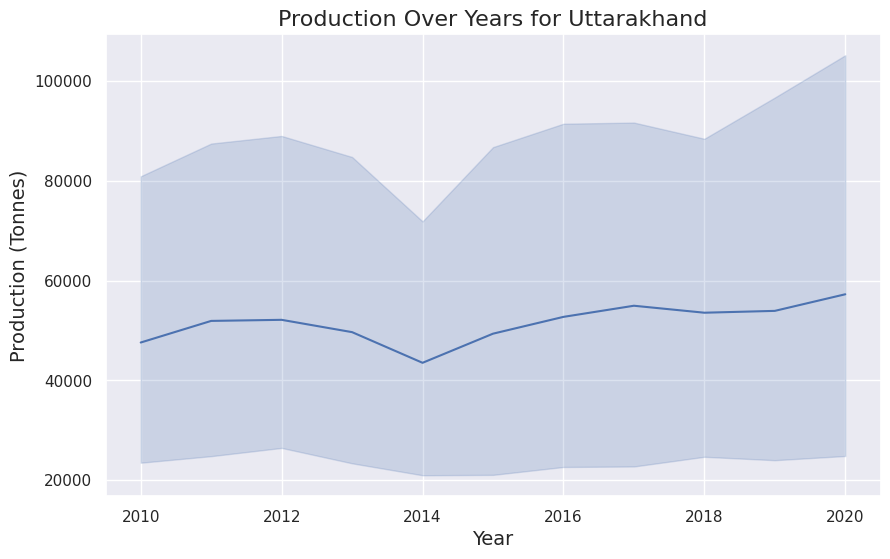

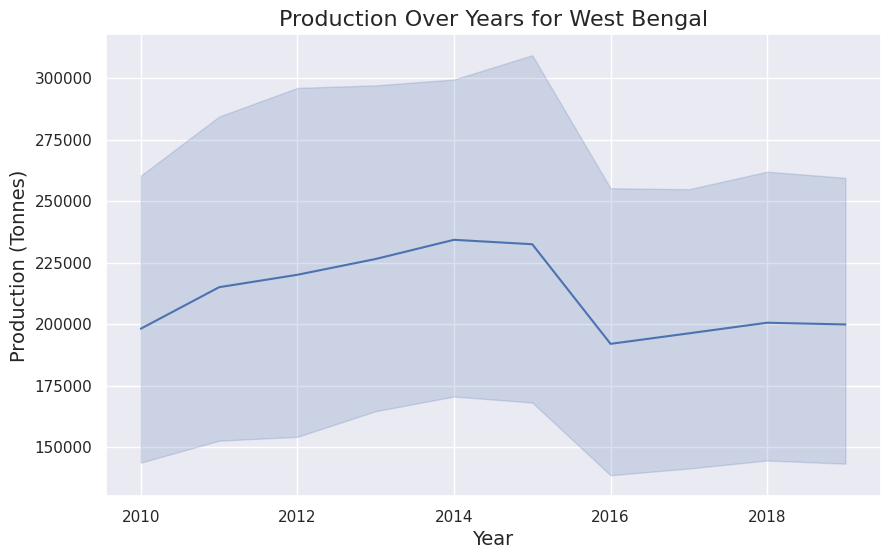

In [129]:
for state in df['State and UT'].unique():
    # Create a figure for each state
    plt.figure(figsize=(10, 6))

    # Plot the line for the current state
    sns.lineplot(x=df[df['State and UT'] == state]['Year'],
                 y=df[df['State and UT'] == state]['Production (Tonnes)'])

    # Set title and labels
    plt.title(f'Production Over Years for {state}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Production (Tonnes)', fontsize=14)

    # Show the plot
    plt.show()

In [130]:
df['District'].nunique()

774

In [131]:
grouped_df = df.groupby(['State and UT', 'District'])['Production (Tonnes)'].sum()

# Sort the grouped data and select the top 10 districts based on 'Production (Tonnes)'
top_10_districts = grouped_df.sort_values(ascending=False).head(10)

# Display the result
print(top_10_districts)

State and UT  District       
Punjab        Sangrur            27280000.0
              Ludhiana           23194000.0
              Patiala            20049000.0
West Bengal   Medinipur West     18598637.0
Punjab        Bathinda           18277000.0
West Bengal   Purba Bardhaman    18040861.0
Punjab        Firozepur          18025000.0
Haryana       Sirsa              17436400.0
Punjab        Moga               16331000.0
              Muktsar            15746000.0
Name: Production (Tonnes), dtype: float64


In [132]:
df['Crop'].value_counts()

,count
Crop,
Rice,10297
Wheat,5189


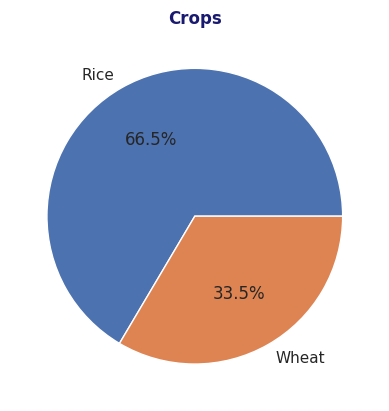

In [133]:
plt.pie(df['Crop'].value_counts(),
        labels=['Rice', 'Wheat'],
        autopct='%1.1f%%')

plt.title('Crops', color='midnightblue', weight='bold')
plt.show()

In [134]:
df.groupby('Crop')['Production (Tonnes)'].sum().reset_index().sort_values(
    by='Production (Tonnes)', ascending=False)

,Crop,Production (Tonnes)
0,Rice,1.113296e+09
1,Wheat,1.057289e+09


Text(0.5, 1.0, 'crop production')

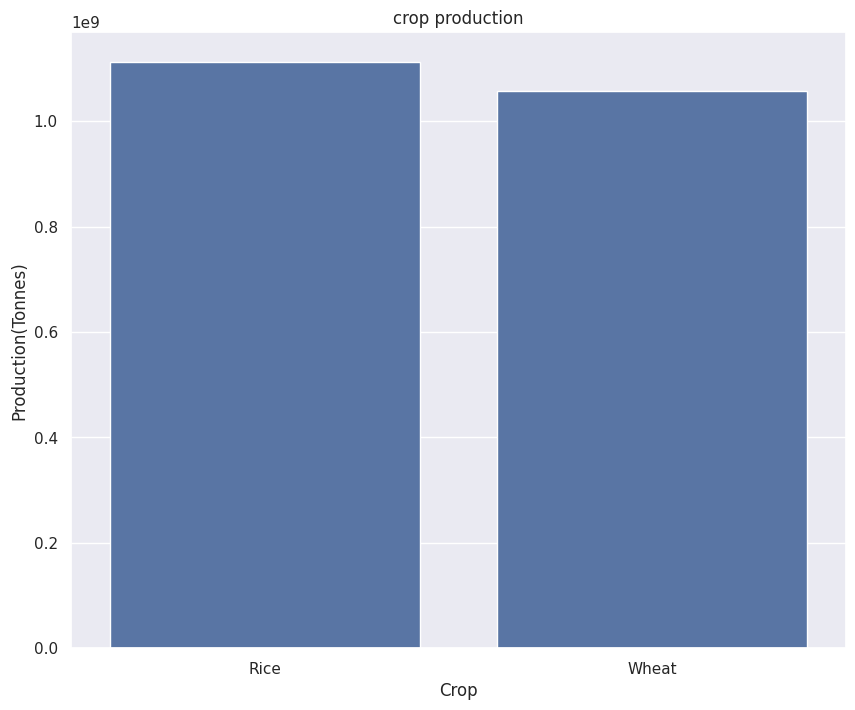

In [135]:
DF = df.copy()
DF = DF.groupby(
    by='Crop')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['Crop'], y=DF['Production (Tonnes)'])
plt.xlabel('Crop')
plt.ylabel('Production(Tonnes)')
plt.title('crop production')


In [136]:
rice = df[df['Crop'] == 'Rice']
rice

,State and UT,District,Crop,Year,Season,Area (Hectare),Production (Tonnes)
0,Andaman and Nicobar Islands,Nicobars,Rice,2010,Autumn,3.50,10.0
1,Andaman and Nicobar Islands,Nicobars,Rice,2011,Autumn,1.50,2.5
2,Andaman and Nicobar Islands,Nicobars,Rice,2012,Autumn,0.35,0.4
3,Andaman and Nicobar Islands,Nicobars,Rice,2013,Autumn,2.65,6.3
4,Andaman and Nicobar Islands,Nicobars,Rice,2014,Autumn,4.60,10.8
...,...,...,...,...,...,...,...
18064,West Bengal,Purulia,Rice,2018,Summer,378.00,1144.0
18065,West Bengal,Purulia,Rice,2018,Winter,281236.00,615025.0
18067,West Bengal,Purulia,Rice,2019,Autumn,346.00,801.0
18068,West Bengal,Purulia,Rice,2019,Summer,544.00,1644.0


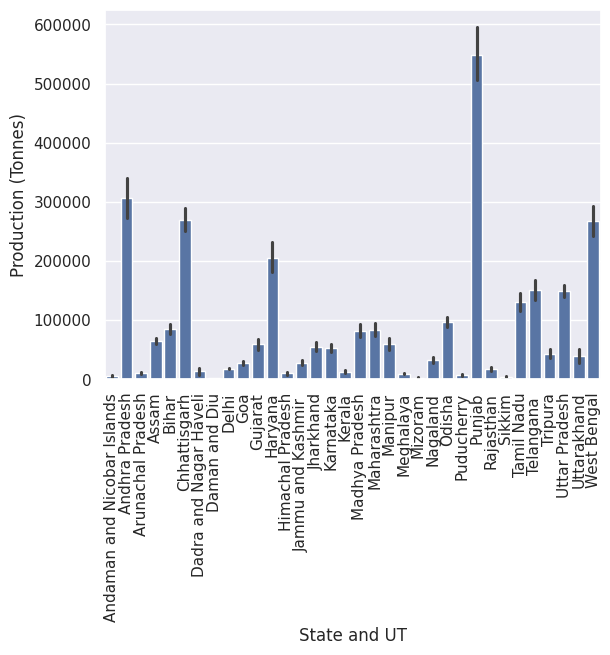

In [137]:
sns.barplot(x='State and UT', y='Production (Tonnes)', data=rice)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='District', ylabel='Production (Tonnes)'>

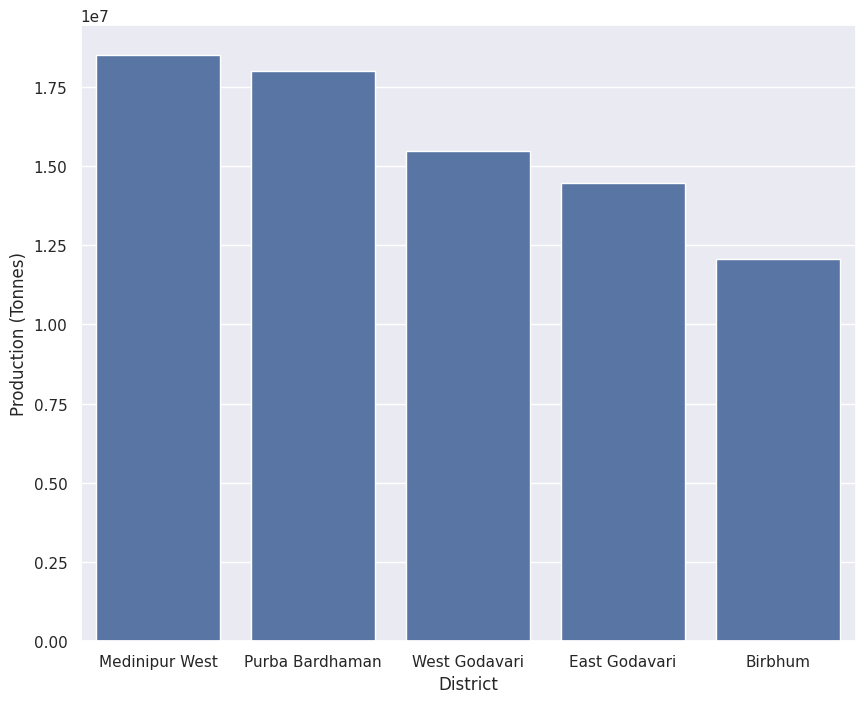

In [138]:
DF = rice.copy()
DF = DF.groupby(
    by='District')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['District'].head(),
            y=DF['Production (Tonnes)'].head())


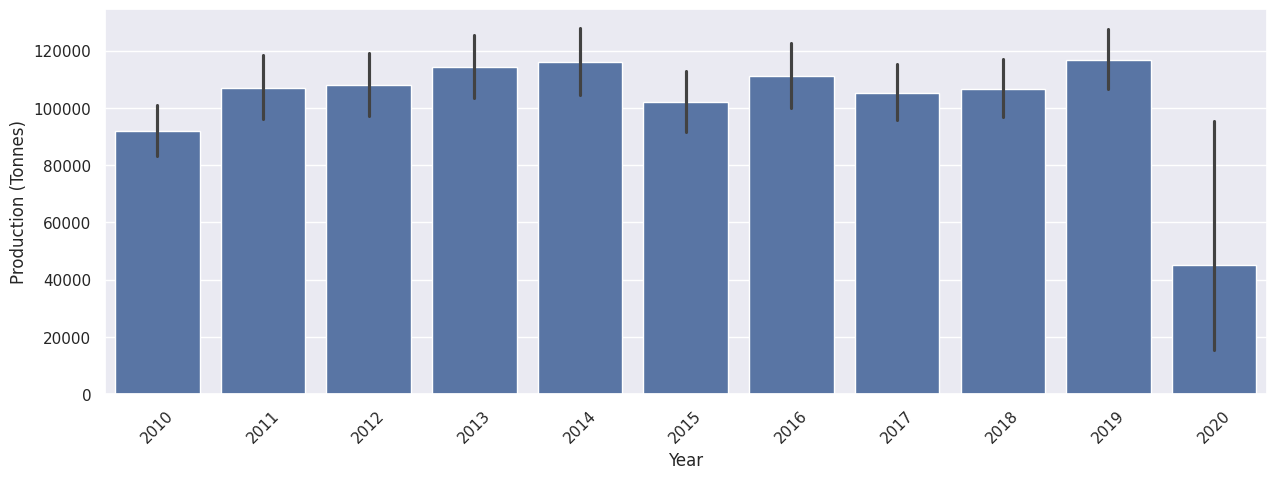

In [139]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Production (Tonnes)', data=rice)
plt.xticks(rotation=45)
plt.show()

In [140]:
wheat = df[df['Crop'] == 'Wheat']
wheat.head()

,State and UT,District,Crop,Year,Season,Area (Hectare),Production (Tonnes)
488,Andhra Pradesh,Adilabad,Wheat,2010,Rabi,4046.0,5199.0
489,Andhra Pradesh,Adilabad,Wheat,2011,Rabi,3275.0,4330.0
490,Andhra Pradesh,Adilabad,Wheat,2012,Rabi,4000.0,4000.0
491,Andhra Pradesh,Anantapur,Wheat,2010,Rabi,131.0,171.0
492,Andhra Pradesh,Anantapur,Wheat,2011,Rabi,75.0,100.0


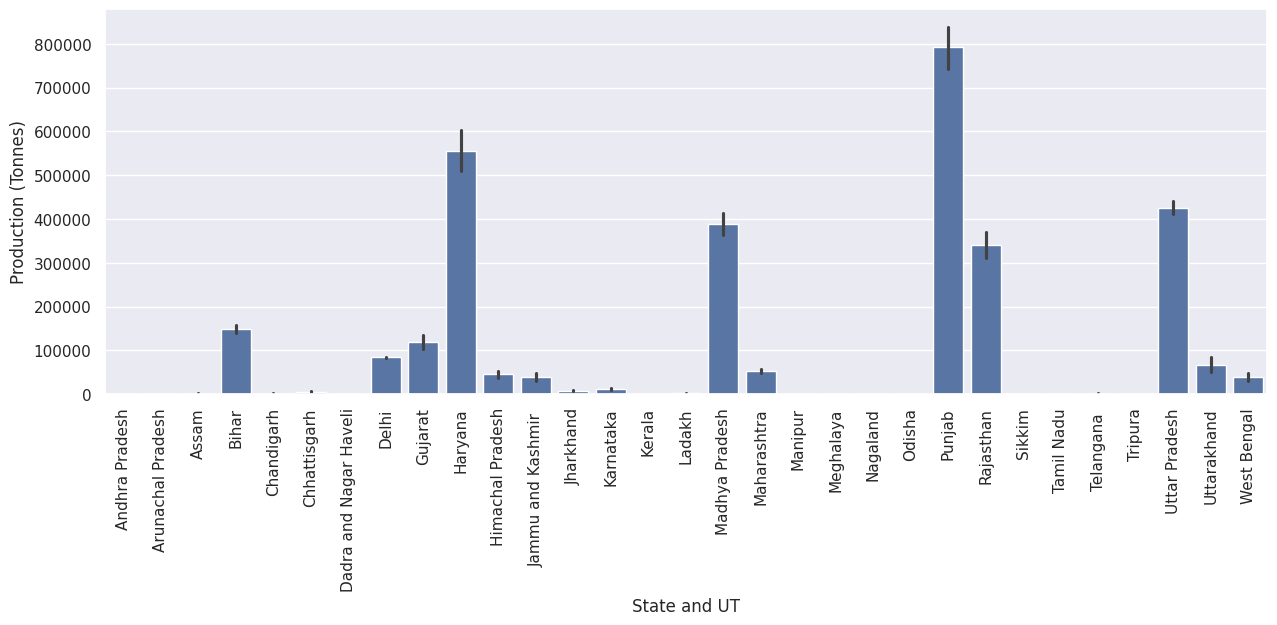

In [141]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State and UT', y='Production (Tonnes)', data=wheat)
plt.xticks(rotation=90)
plt.show()

In [142]:
# Group by 'District', sum the production, and sort in descending order
TopWheatPro = wheat.groupby('District')['Production (Tonnes)'].sum().reset_index().sort_values(
    'Production (Tonnes)', ascending=False)

# Calculate the total sum of production
total_production = TopWheatPro['Production (Tonnes)'].sum()

# Calculate the percentage of production for each district
TopWheatPro['Production in %'] = (TopWheatPro['Production (Tonnes)'] / total_production) * 100

# Display the top results
TopWheatPro.head(10)


,District,Production (Tonnes),Production in %
494,Sangrur,15376000.0,1.454285
527,Sirsa,14890500.0,1.408366
84,Bathinda,12798000.0,1.210454
351,Ludhiana,12659000.0,1.197307
437,Patiala,11618000.0,1.098848
198,Firozepur,11373000.0,1.075675
241,Hoshangabad,10855431.0,1.026723
232,Hardoi,10771799.0,1.018813
239,Hisar,10538200.0,0.996719
202,Ganganagar,10526137.0,0.995578


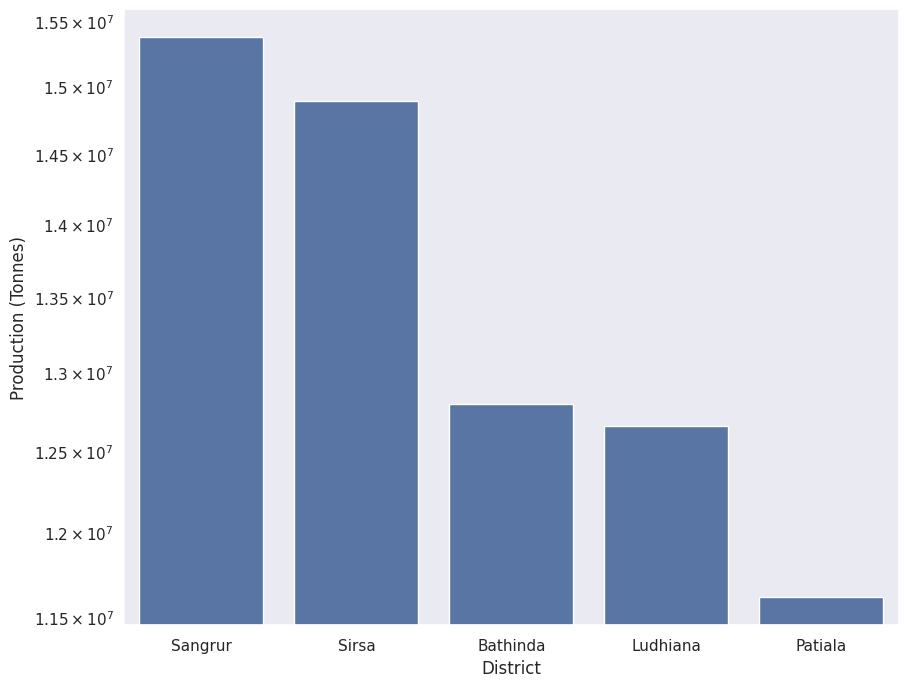

In [143]:
DF1 = wheat.copy()
DF1 = DF1.groupby(
    by='District')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF1['District'].head(),
            y=DF1['Production (Tonnes)'].head())
plt.yscale('log')

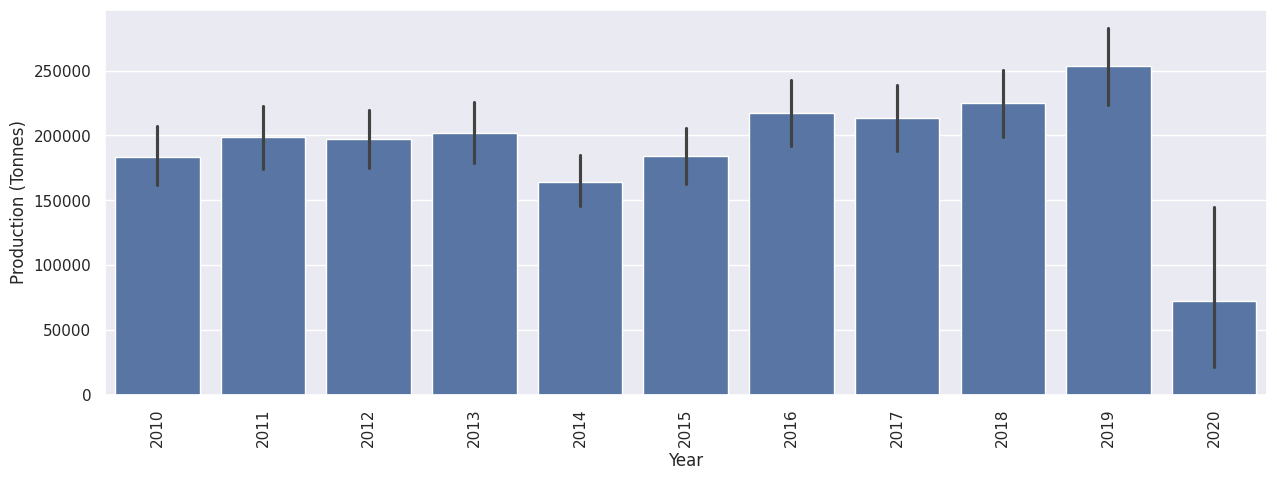

In [144]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Production (Tonnes)', data=wheat)
plt.xticks(rotation=90)
plt.show()

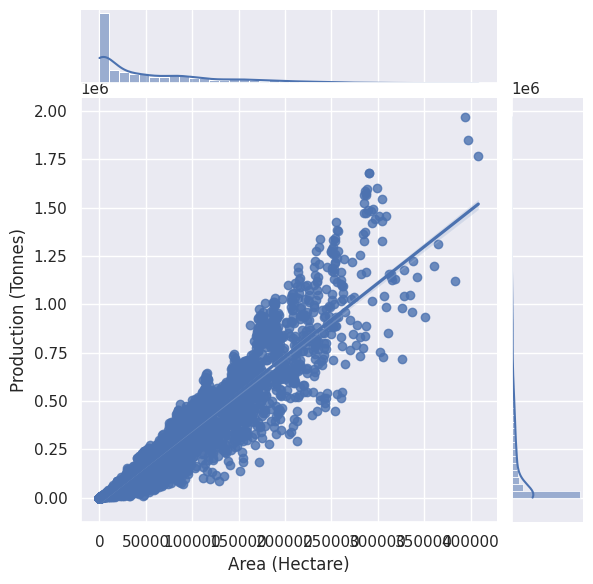

In [145]:
sns.jointplot(x='Area (Hectare)',
              y='Production (Tonnes)',
              data=wheat,
              kind='reg')

In [146]:
df['Year'].value_counts()

,count
Year,
2019,1675
2017,1648
2018,1644
2016,1591
2015,1511
2014,1506
2012,1503
2011,1500
2013,1483


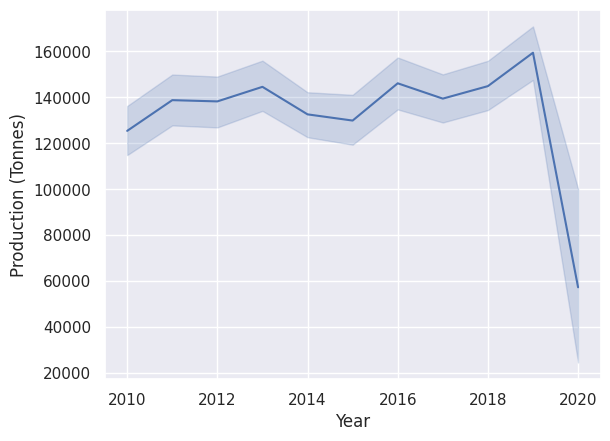

In [147]:
sns.lineplot(x=df['Year'], y=df['Production (Tonnes)'])
plt.show()

In [148]:
df['Season'].value_counts()

,count
Season,
Rabi,5649
Kharif,4497
Summer,2091
Winter,1669
Autumn,1573
Whole Year,7


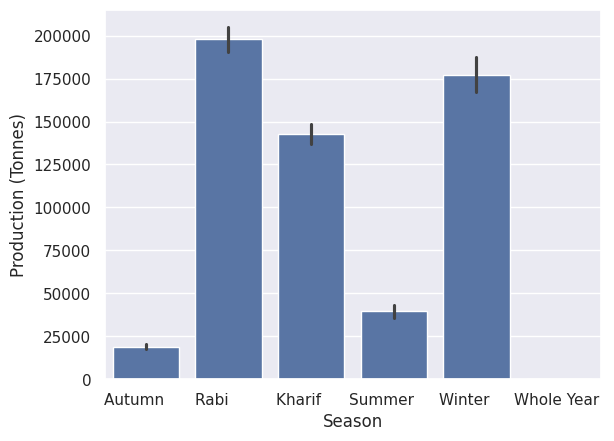

In [149]:
sns.barplot(x=df['Season'], y=df['Production (Tonnes)'])
plt.show()

In [150]:
df['Season'].value_counts()

,count
Season,
Rabi,5649
Kharif,4497
Summer,2091
Winter,1669
Autumn,1573
Whole Year,7


<ipython-input-151-a64314219fd7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 100)` for the same effect.

  sns.barplot(x='Season', y='Production (Tonnes)', data=rice, ci=100)


<Axes: xlabel='Season', ylabel='Production (Tonnes)'>

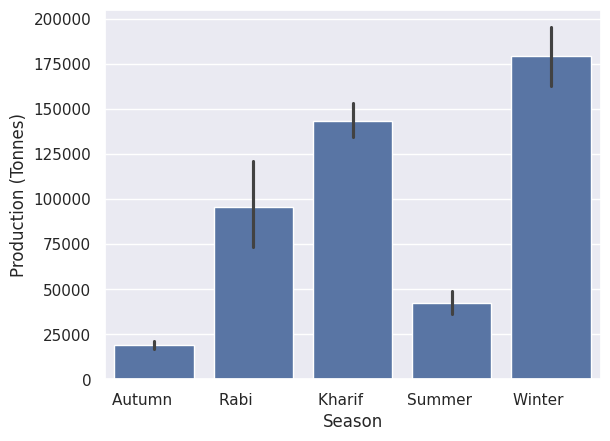

In [151]:
sns.barplot(x='Season', y='Production (Tonnes)', data=rice, ci=100)


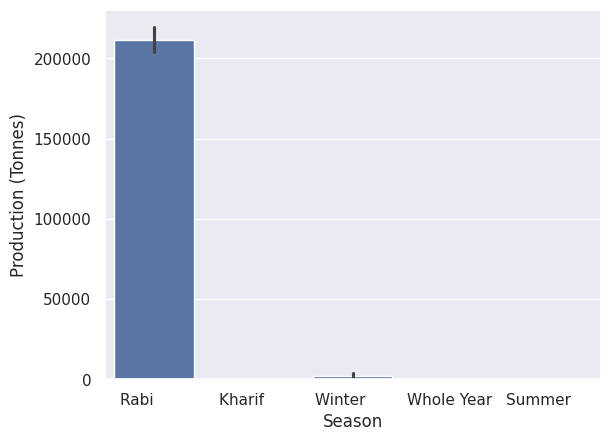

In [152]:
sns.barplot(x='Season', y='Production (Tonnes)', data=wheat)
sns.set(font_scale=1)

In [153]:
# # List of categorical columns to encode
# categorical_columns = ['State and UT', 'Season', 'Crop', 'District']

# # Loop through each categorical column
# for column in categorical_columns:
#     # Create one-hot encoded columns
#     cat_dummies = pd.get_dummies(df[column], dtype=int, drop_first=True)

#     # Merge the one-hot encoded columns with the original DataFrame
#     df = pd.concat([df, cat_dummies], axis=1)

#     # Drop the original categorical column
#     df.drop(columns=column, inplace=True)

# # Display the updated DataFrame
# print(df)


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15486 entries, 0 to 18261
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State and UT         15486 non-null  object 
 1   District             15486 non-null  object 
 2   Crop                 15486 non-null  object 
 3   Year                 15486 non-null  int64  
 4   Season               15486 non-null  object 
 5   Area (Hectare)       15486 non-null  float64
 6   Production (Tonnes)  15486 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 967.9+ KB


In [155]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State and UT'])
df['District_encoded'] = label_encoder.fit_transform(df['District'])

In [156]:
df.describe()


,Year,Area (Hectare),Production (Tonnes),crop_encoded,season_encoded,state_encoded,District_encoded
count,15486.000000,15486.000000,1.548600e+04,15486.000000,15486.000000,15486.000000,15486.000000
mean,2014.657949,49065.255867,1.401644e+05,0.335077,1.965711,19.122562,419.237376
std,2.881327,66086.220051,2.228372e+05,0.472033,1.342550,10.864063,200.417997
min,2010.000000,0.350000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2039.000000,3.529000e+03,0.000000,1.000000,11.000000,246.000000
50%,2015.000000,18235.500000,3.732200e+04,0.000000,2.000000,19.000000,416.000000
75%,2017.000000,76007.500000,1.859012e+05,1.000000,2.000000,30.000000,590.000000
max,2020.000000,687000.000000,1.969000e+06,1.000000,5.000000,35.000000,773.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15486 entries, 0 to 18261
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State and UT         15486 non-null  object 
 1   District             15486 non-null  object 
 2   Crop                 15486 non-null  object 
 3   Year                 15486 non-null  int64  
 4   Season               15486 non-null  object 
 5   Area (Hectare)       15486 non-null  float64
 6   Production (Tonnes)  15486 non-null  float64
 7   crop_encoded         15486 non-null  int64  
 8   season_encoded       15486 non-null  int64  
 9   state_encoded        15486 non-null  int64  
 10  District_encoded     15486 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df['Area (Hectare)'] = scaler.fit_transform(df[['Area (Hectare)']])
df['Production (Tonnes)'] = scaler.fit_transform(df[['Production (Tonnes)']])


In [159]:
features = [ 'Year','crop_encoded', 'state_encoded','District_encoded','Area (Hectare)']
target   = [ 'Production (Tonnes)' ]

X = df.loc[: , features]
Y = df.loc[: , target]


In [162]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.4,random_state = 20)

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model1=RandomForestRegressor()

model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.0430516718088471
Mean Absolute Error: 0.09746309675856621
R-squared (R2): 0.9578456315156849


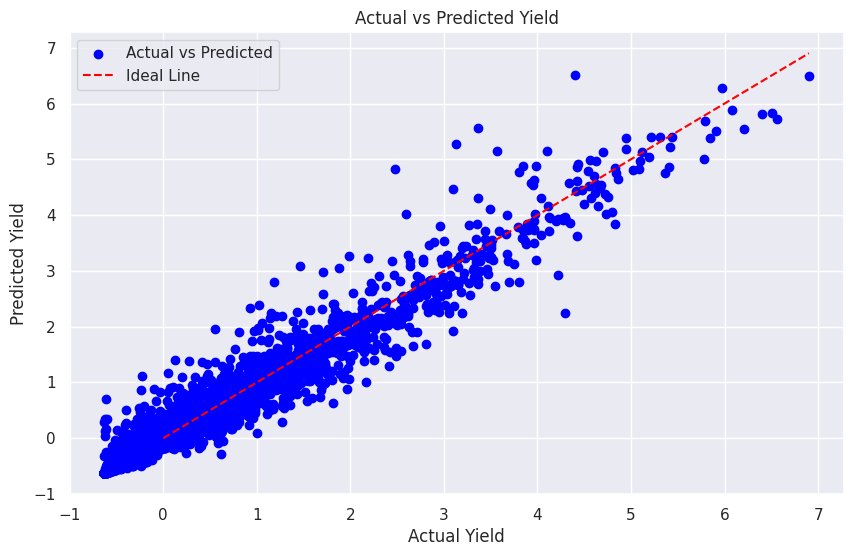

In [168]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))

plt.scatter(y_test.values, y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(y_test), np.max(y_pred)])

plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()